# W9 Lab Assignment

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

%matplotlib inline

# KDE

Import the IMDb data.

In [3]:
movie_df = pd.read_csv('imdb.csv', delimiter='\t')
movie_df.head()

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61
2,#7DaysLater,2013,7.1,14
3,#Bikerlive,2014,6.8,11
4,#ByMySide,2012,5.5,13


We can plot histogram and KDE using pandas:

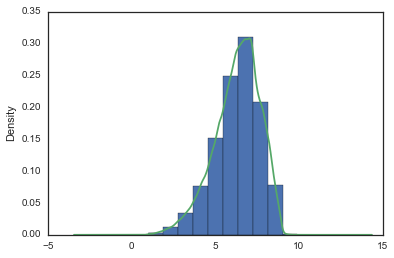

In [4]:
movie_df['Rating'].hist(bins=10, normed=True)
movie_df['Rating'].plot(kind='kde')

Or using seaborn:

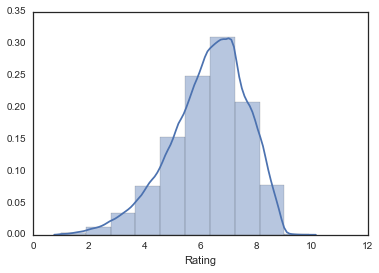

In [5]:
sns.distplot(movie_df['Rating'], bins=10)

Can you plot the histogram and KDE of the log of movie votes?

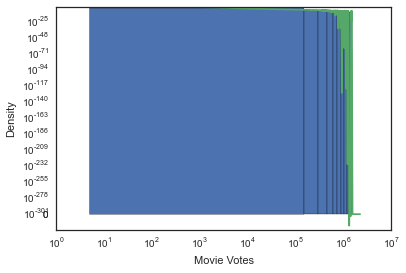

In [5]:
# TODO: implement this using pandas
movie_df['Votes'].hist(bins=10, normed=True)
plt.xlabel('Movie Votes')
plt.yscale('log')
plt.xscale('log')
movie_df['Votes'].plot(kind='kde')

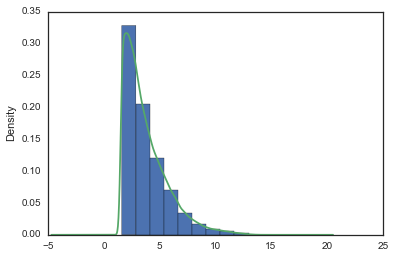

In [4]:
np.log(movie_df['Votes']).hist(bins=10, normed=True)
np.log(movie_df['Votes']).plot(kind='kde')

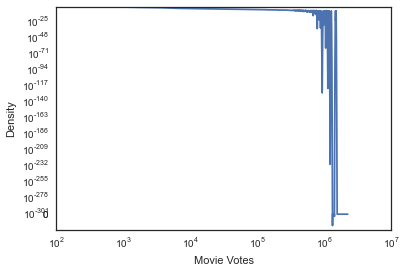

In [18]:
movie_df['Votes'].plot(kind='kde')
plt.xlabel('Movie Votes')
plt.yscale('log')
plt.xscale('log')

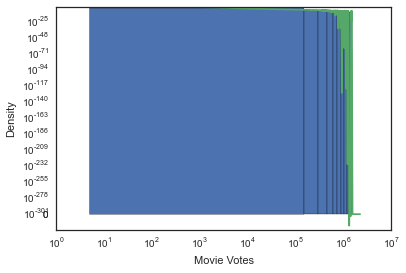

In [19]:
movie_df['Votes'].hist(bins=10, normed=True)
movie_df['Votes'].plot(kind='kde')
plt.xlabel('Movie Votes')
plt.yscale('log')
plt.xscale('log')

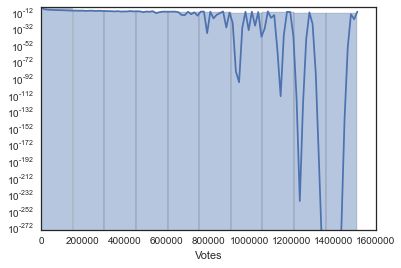

In [7]:
# TODO: implement this using seaborn
sns.distplot(movie_df['Votes'], bins=10)
plt.yscale('log')

We can get a random sample using the pandas' [**`sample()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) function. The [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function in seaborn provides many options (like kernel types) to do KDE.

1 10
2 50
3 100
4 500
5 1000
6 10000


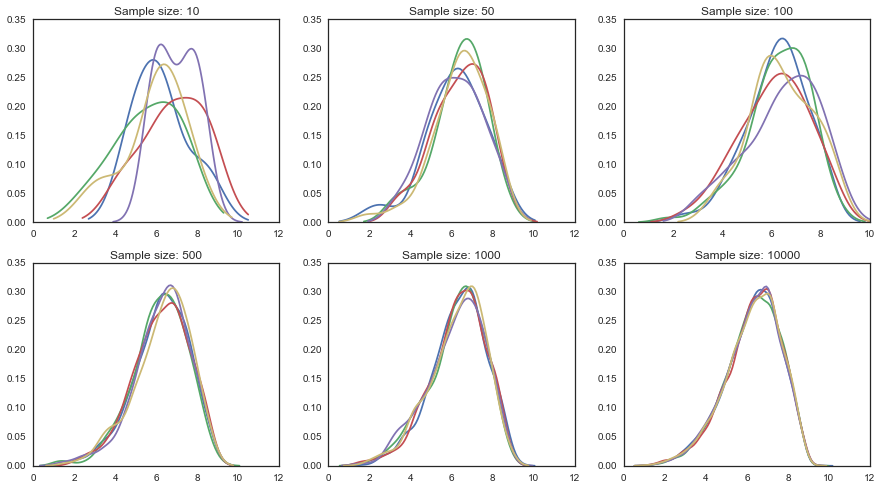

In [22]:
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 10000]
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(2,3,i)
    print i,N
    plt.title("Sample size: {}".format(N))
    for j in range(5):
        s = movie_df['Rating'].sample(N)

        sns.kdeplot(s, kernel='gau', legend=False)

# Regression

Remember [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)? Let's plot the four datasets and do linear regression, which can be done with scipy's [**`linregress()`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function.

**TODO**: display the fitted lines using the [**`text()`**](http://matplotlib.org/users/text_intro.html) function.

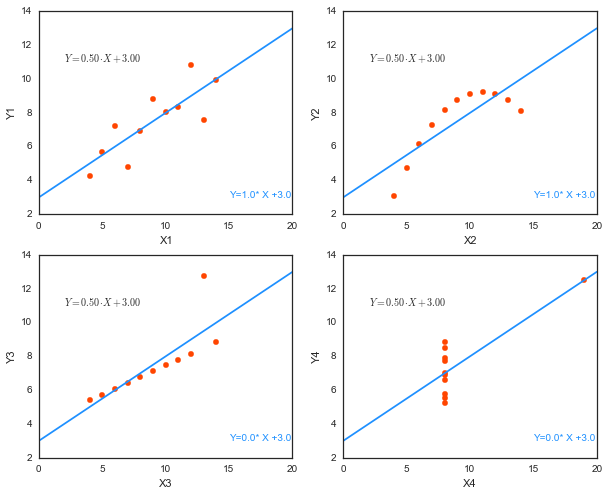

In [3]:
X1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
Y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

X2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
Y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

X3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
Y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

X4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
Y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

data = [ (X1,Y1),(X2,Y2),(X3,Y3),(X4,Y4) ]

plt.figure(figsize=(10,8))

for i,p in enumerate(data, 1):
    X, Y = p[0], p[1]
    plt.subplot(2, 2, i)
    plt.scatter(X, Y, s=30, facecolor='#FF4500', edgecolor='#FF4500')
    slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)
    plt.plot([0, 20], [intercept, slope*20+intercept], color='#1E90FF') #plot the fitted line Y = slope * X + intercept
    
    plt.text(15,3,'Y='+ str(round(slope))+'* X +'+str(round(intercept)), fontsize=10,color='#1E90FF' ) #text function
    plt.text(2, 11, r'$Y = {:1.2f} \cdot X + {:1.2f}$'.format(slope,intercept))

    plt.xlim(0,20)
    plt.xlabel('X'+str(i))
    plt.ylabel('Y'+str(i))

Actually, the dataset is included in seaborn and we can load it. 

In [106]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


All four datasets are in this single data frame and the 'dataset' indicator is one of the columns. This is a form often called [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf), which is easy to manipulate and plot. In tidy data, each row is an observation and columns are the properties of the observation. Seaborn makes use of the tidy form. 

We can show the linear regression results for each eadataset. [Here](https://stanford.edu/~mwaskom/software/seaborn/examples/anscombes_quartet.html) is the example:

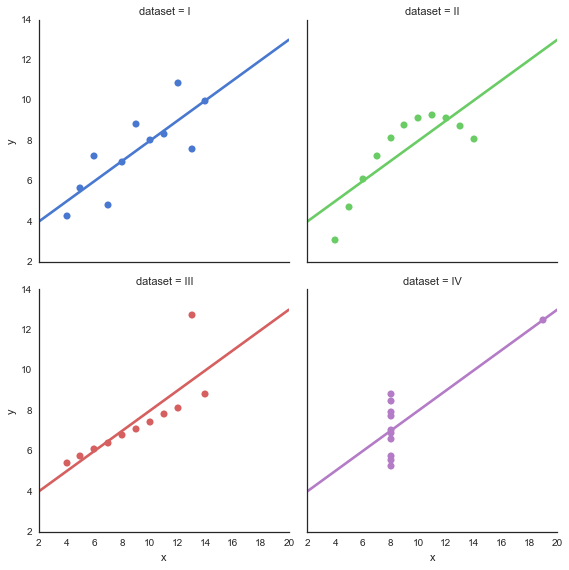

In [43]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

What do these parameters mean? The documentation for the `lmplot()` is [here](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html).

TODO: explain what the parameters (x, y, col, hue, etc.) mean?
Change the values of these parameters and see the results.

x - values of the x axis of the plot from the column values of the dataset.

y - values of the y axis of the plot from the column values of the dataset.

col, hue(notifies the hue set to the plot) - variables that define subsets of the data, in our case, we have four subsets - I, II, III and IV. 

col_wrap - the number of subplots in a column 

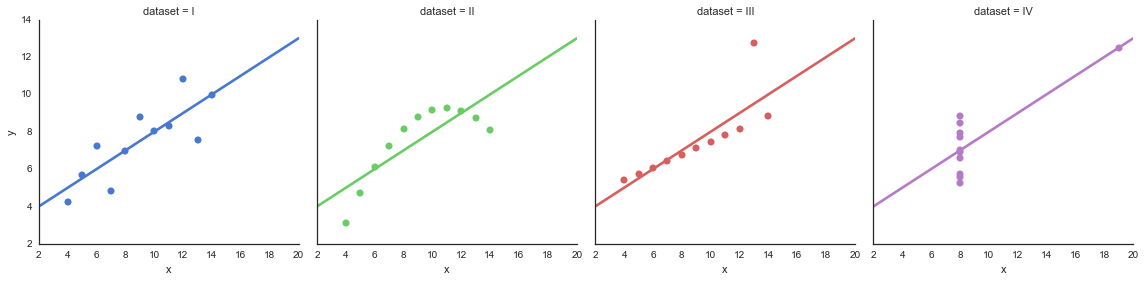

In [117]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=4, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

# 2-D scatter plot and KDE

Select movies released in the 1990s:

In [44]:
geq = movie_df['Year'] >= 1990
leq = movie_df['Year'] <= 1999
subset = movie_df[ geq & leq ]
subset.head()

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
23,'N Sync TV,1998,7.5,11
33,'t Zal je gebeuren...,1998,6.0,7
34,'t Zonnetje in huis,1993,6.1,148
42,.COM,1999,3.8,5


We can draw a scatter plot of movie votes and ratings using the [**`scatter()`**](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function.

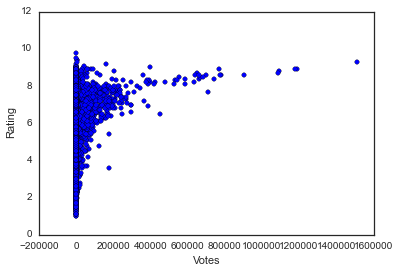

In [45]:
plt.scatter(subset['Votes'], subset['Rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')

Too many data points. We can decrease symbol size, set symbols empty, and make them transparent.

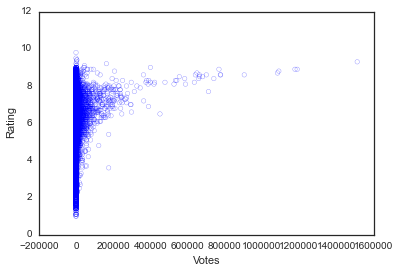

In [46]:
plt.scatter(subset['Votes'], subset['Rating'], s=20, alpha=0.6, facecolors='none', edgecolors='b')
plt.xlabel('Votes')
plt.ylabel('Rating')

Number of votes is broadly distributed. So set the x axis to log scale.

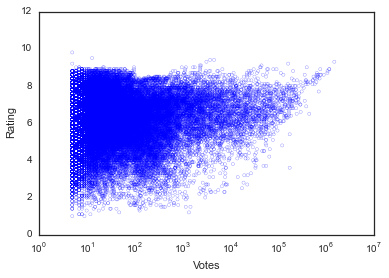

In [47]:
plt.scatter(subset['Votes'], subset['Rating'], s=10, alpha=0.6, facecolors='none', edgecolors='b')
plt.xscale('log')
plt.xlabel('Votes')
plt.ylabel('Rating')

We can combine scatter plot with 1D histogram using seaborn's [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) function.

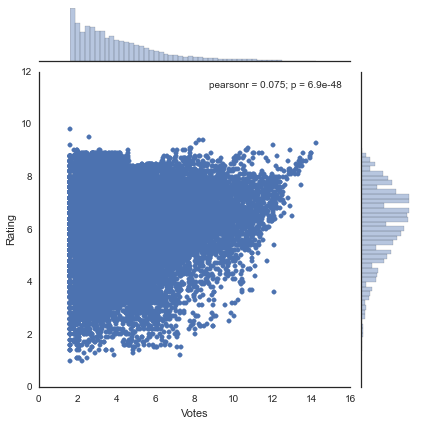

In [48]:
sns.jointplot(np.log(subset['Votes']), subset['Rating'])

## Hexbin

There are too many data points. We need to bin them, which can be done by using the [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) and setting the `kind` parameter.

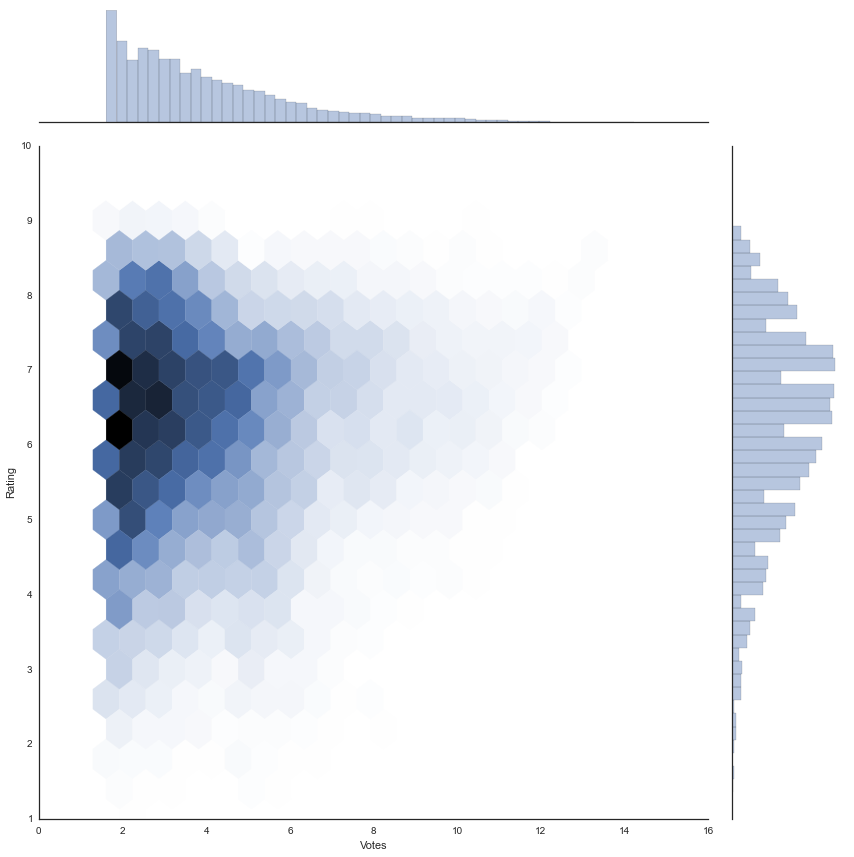

In [49]:
# TODO: draw a joint plot with hexbins and two histograms for each marginal distribution
sns.jointplot(np.log(subset['Votes']), subset['Rating'],size=12, joint_kws={'gridsize':20}, kind="hex", stat_func=None)

## KDE

We can also do 2D KDE using seaborn's [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function.

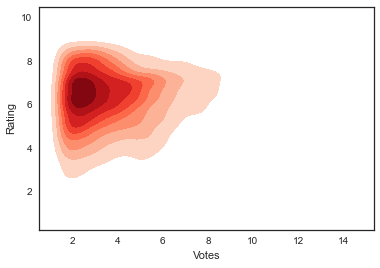

In [50]:
sns.kdeplot(np.log(subset['Votes']), subset['Rating'], cmap="Reds", shade=True, shade_lowest=False)

Or using [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) by setting the `kind` parameter.

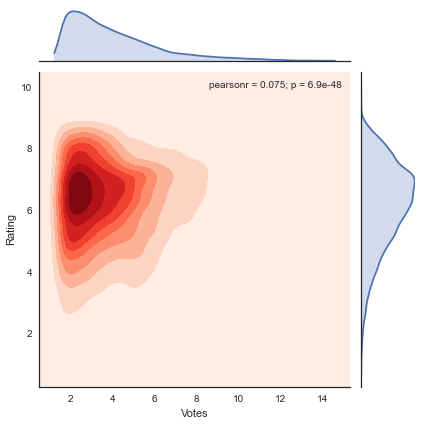

In [51]:
# TODO: draw a joint plot with bivariate KDE as well as marginal distributions with KDE
sns.jointplot(np.log(subset['Votes']), subset['Rating'], cmap="Reds", shade=True, kind="kde")

# High dimensional data

In the IMDb dataset, we have two dimensions (number of votes and rating). How about if we have high dimensional data? First, in many cases, the number of dimensions is not too large. For instance, the ["Iris" dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) contains four dimensions of measurements on the three types of iris flower species. It's more than two dimensions, yet still manageable. 

This dataset is also included in seaborn, so we can load it.

In [66]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


It's often useful to look at the basic statistics of variables:

In [67]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We get four dimensions (sepal_length, sepal_width, petal_length, petal_width). One direct way to visualize them is to have a scatter plot for each pair of dimensions. We can use the [**`pairplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function in seaborn to do this.

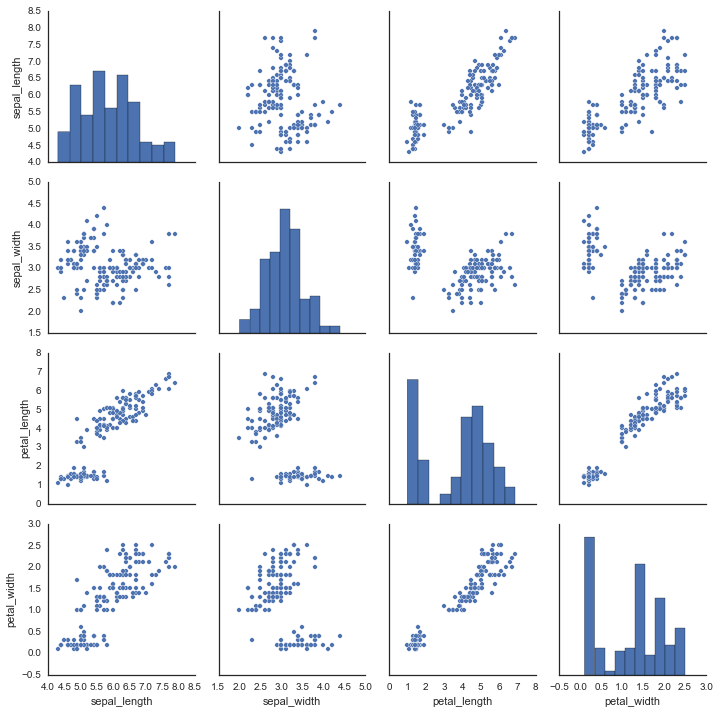

In [80]:
sns.pairplot(iris)

We can also color the symbols based on species:

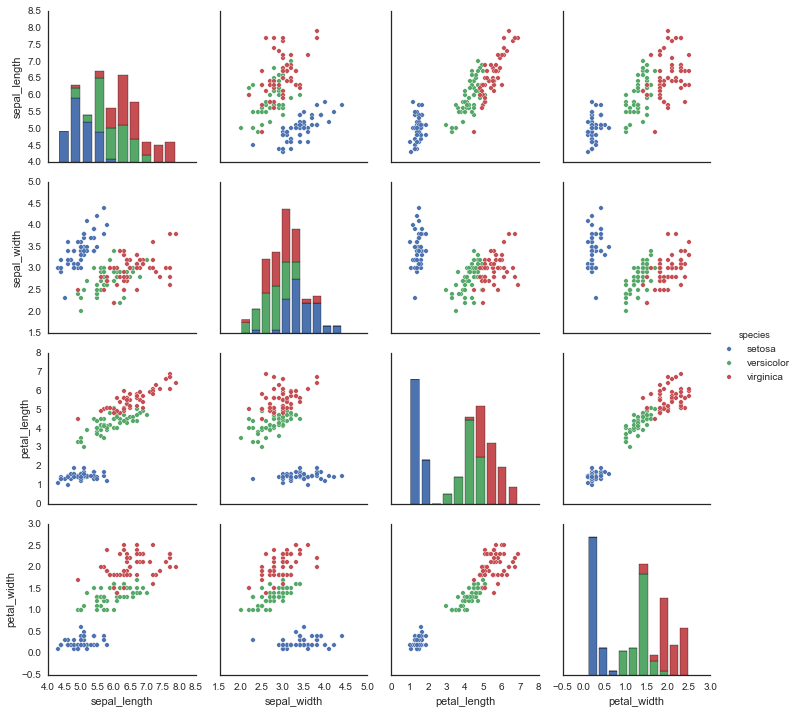

In [69]:
sns.pairplot(iris, hue='species')

## PCA 

The [principal component analysis (PCA)](http://setosa.io/ev/principal-component-analysis/) is a nice dimensionality reduction method. The goal of dimensionality reduction is, of course, to reduce the number of variables (dimensions, measurements, columns). 

For example, in the Iris dataset we have four variables (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`). If we can reduce the number of variables to two, then we can easily visualize them. PCA offers one way to do this.

PCA is already implemented in the [scikit-learn](http://scikit-learn.org/stable/) package, a machine learning library in Python, which should have been included in Anaconda. If not, to install scikit-learn, run:

`conda install scikit-learn`

or

`pip install scikit-learn`

Before running PCA, we need to transform the `iris` from [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) to [Numpy's array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object. [DataFrame.values](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) returns the Numpy representation of `DataFrame`.

In [70]:
print(iris.values)

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [5.4 3.4 1.7 0.2 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.1 3.3 1.7 0.5 'setosa']
 [4.8 3.4 1.9 0.2 'setosa']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [5.2 3.5 1.5 0.2 'setosa']
 [5.2 3.4 1.4 0.2 'setosa']
 [4.7 3.2 1.6 0.2 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 4.1 1.5 0.1 'setosa']
 [5.5 4.2 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.2 'setosa']
 [5.0 3.2 1.2 0.2 's

Extract the four variable as X and species as Y:

In [71]:
X = iris.values[:, 0:4] # extract the 1st to the 3rd columns of all rows
Y = iris.values[:, 4] # extract the 4th column of all rows
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

We can now do the PCA on the four variables (`X`). The first step is to initialize a [**`PCA`**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) object.

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # set the number of components to 2

We then fit `X` to get the model and then transform the original data of four variables (`X`) to two variables (components).

In [74]:
X_r = pca.fit(X).transform(X)
print(X_r)

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937002]
 

Now we can assemble the two components and the `species` column into a DataFrame.

In [78]:
df = pd.DataFrame(X_r, columns=['PC1', 'PC2'])
df.head()
df['species'] = Y
df.head()

,PC1,PC2,species
0,-2.684126,-0.319397,setosa
1,-2.714142,0.177001,setosa
2,-2.888991,0.144949,setosa
3,-2.745343,0.318299,setosa
4,-2.728717,-0.326755,setosa


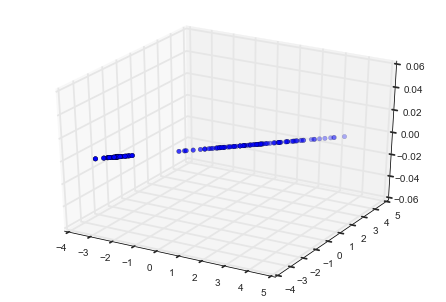

In [93]:
# TODO: show the scatter plot the two components using pairplot()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig) # use the plotting figure to create a Axis3D object.
ax.scatter(df['PC1'], df['PC1'])

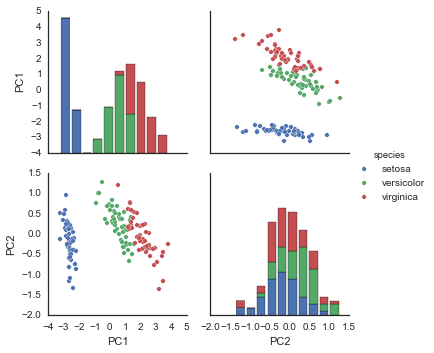

In [96]:
sns.pairplot(df, hue='species')
fig2=plt.figure()

In [102]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig2) # use the plotting figure to create a Axis3D object.
ax.scatter(df['PC1'], df['PC1'])